In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage.io import imread
from skimage import color
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), 
                                        int(color[1]), 
                                        int(color[2]))

In [3]:
url = "https://www.belezanaweb.com.br/mac-studio-fix-fluid-fps-15-nc50-base-liquida-30ml/"
html = urlopen(url)
soup = BeautifulSoup(html, 'html')

In [4]:
all_colors = soup.find_all("div", {"class": "product-group-items"})

In [5]:
all_colors = all_colors[0].find_all("a", {"class": "product-group-item product-group-sample"},  href=True)

In [6]:
all_codes = []
all_urls = []
all_prices = []
all_images = []

for index in all_colors:
    tag_color = index\
                    .find("p", {"class":"product-attributes"})\
                    .b.contents[0]
    
    try:
        price_tmp = index\
            .span\
            .contents[0]
        
        disc = index.find("span", {"class": "item-discount"})\
            .contents[0]\
            .strip()\
            .replace('-', "")
        
        price_tmp = price - (dics * price_tmp)
        
    except:
        price_tmp = index\
            .find("div", {"class": "item-price-value"})\
            .contents[0]\
            .strip()
        
    all_codes.append(tag_color)
    all_prices.append(price_tmp)
    all_urls.append(index['href'])
    all_images.append(index.find("img")["src"])

In [7]:
data = pd.DataFrame({
    "code": all_codes,
    "url": all_urls,
    "price": all_prices,
    "url_img": all_images
})

In [8]:
data.head()

,code,url,price,url_img
0,NC46,https://www.belezanaweb.com.br/mac-studio-fix-...,"R$ 130,90",https://res.cloudinary.com/beleza-na-web/image...
1,NW57,https://www.belezanaweb.com.br/mac-studio-fix-...,"R$ 139,90",https://res.cloudinary.com/beleza-na-web/image...
2,NW46,https://www.belezanaweb.com.br/mac-base-liquid...,"R$ 143,90",https://res.cloudinary.com/beleza-na-web/image...
3,C4,https://www.belezanaweb.com.br/mac-studio-fix-...,"R$ 148,90",https://res.cloudinary.com/beleza-na-web/image...
4,NC47,https://www.belezanaweb.com.br/mac-studio-fix-...,"R$ 150,90",https://res.cloudinary.com/beleza-na-web/image...


## Salvando a Imagens

In [9]:
for index, value in data.iterrows():

    resource = urlopen(value.url_img)
    output = open("images/" + value.code + '.jpg',"wb")
    output.write(resource.read())
    output.close()

## Convertendo as Imagens em RGBA > RGB > HEX

In [10]:
img = imread('images/NC20.jpg')
img_rgb = color.rgba2rgb(img)

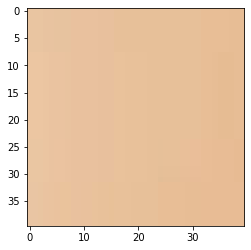

In [11]:
plt.imshow(img_rgb)

In [12]:
img_rgb = img_rgb * 256

In [13]:
rgb_img_mean = (int(img_rgb[:,:,0].mean()), 
                int(img_rgb[:,:,1].mean()), 
                int(img_rgb[:,:,2].mean()))

rgb_img_max = (int(img_rgb[:,:,0].max()), 
               int(img_rgb[:,:,1].max()), 
               int(img_rgb[:,:,2].max()))

rgb_img_min = (int(img_rgb[:,:,0].min()), 
               int(img_rgb[:,:,1].min()), 
               int(img_rgb[:,:,2].min()))

In [14]:
RGB2HEX(rgb_img_mean)

'#e9c19b'

In [15]:
RGB2HEX(rgb_img_max)

'#ecc6a3'

In [16]:
RGB2HEX(rgb_img_min)

'#e4bb94'

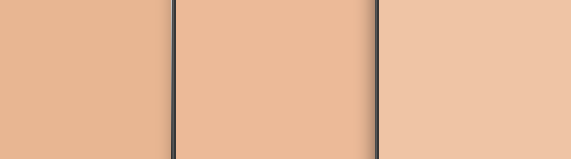

### Adicionando HEX Colors ao DataFrame

In [17]:
all_hex_min = []
all_hex_mean = []
all_hex_max = []

for path in data.code:
    
    img = imread("images/" + path + ".jpg")
    
    try:
        img_rgb = color.rgba2rgb(img)
        img_rgb = img_rgb * 255
        
    except:
        img_rgb = img
        
    rgb_img_mean = (int(img_rgb[:,:,0].mean()), 
                    int(img_rgb[:,:,1].mean()), 
                    int(img_rgb[:,:,2].mean()))

    rgb_img_max = (int(img_rgb[:,:,0].max()), 
                   int(img_rgb[:,:,1].max()), 
                   int(img_rgb[:,:,2].max()))

    rgb_img_min = (int(img_rgb[:,:,0].min()), 
                   int(img_rgb[:,:,1].min()), 
                   int(img_rgb[:,:,2].min()))
    
    all_hex_min.append(RGB2HEX(rgb_img_min))
    all_hex_max.append(RGB2HEX(rgb_img_max))
    all_hex_mean.append(RGB2HEX(rgb_img_mean))

In [18]:
data["hex_min"] = all_hex_min
data["hex_mean"] = all_hex_mean
data["hex_max"] = all_hex_max

In [19]:
data.head()

,code,url,price,url_img,hex_min,hex_mean,hex_max
0,NC46,https://www.belezanaweb.com.br/mac-studio-fix-...,"R$ 130,90",https://res.cloudinary.com/beleza-na-web/image...,#d37f43,#df8c4f,#faa870
1,NW57,https://www.belezanaweb.com.br/mac-studio-fix-...,"R$ 139,90",https://res.cloudinary.com/beleza-na-web/image...,#7f3c1d,#874424,#9e5937
2,NW46,https://www.belezanaweb.com.br/mac-base-liquid...,"R$ 143,90",https://res.cloudinary.com/beleza-na-web/image...,#c27644,#c87b48,#d18554
3,C4,https://www.belezanaweb.com.br/mac-studio-fix-...,"R$ 148,90",https://res.cloudinary.com/beleza-na-web/image...,#f9bb89,#fdc595,#ffdaae
4,NC47,https://www.belezanaweb.com.br/mac-studio-fix-...,"R$ 150,90",https://res.cloudinary.com/beleza-na-web/image...,#d5803b,#e18a47,#f8a361


In [20]:
def highlight_max(s):
    return ['background-color: ' + x for x in s]

In [21]:
data_final = data.style.apply(highlight_max, subset=['hex_mean', 'hex_min', 'hex_max'])

In [22]:
data_final

,code,url,price,url_img,hex_min,hex_mean,hex_max
0,NC46,https://www.belezanaweb.com.br/mac-studio-fix-fluid-fps-15-nc46-base-liquida-30ml/,"R$ 130,90","https://res.cloudinary.com/beleza-na-web/image/upload/f_auto,fl_progressive,q_auto:best/v1/imagens/products/38807/38807_m.png",#d37f43,#df8c4f,#faa870
1,NW57,https://www.belezanaweb.com.br/mac-studio-fix-fluid-fps-15-nw57-base-liquida-30ml/,"R$ 139,90","https://res.cloudinary.com/beleza-na-web/image/upload/f_auto,fl_progressive,q_auto:best/v1/imagens/product/60961/0f836a2d-8adc-4d44-945f-eb76a0246724-mac-studio-fix-fluid-fps-15-nw57-base-liquida-30ml-sample.png",#7f3c1d,#874424,#9e5937
2,NW46,https://www.belezanaweb.com.br/mac-base-liquida-facial-studio-fix-fluid-spf-15-nw46-30ml/,"R$ 143,90","https://res.cloudinary.com/beleza-na-web/image/upload/f_auto,fl_progressive,q_auto:best/v1/imagens/mini/7338262619839811072-18413.jpg",#c27644,#c87b48,#d18554
3,C4,https://www.belezanaweb.com.br/mac-studio-fix-fluid-fps-15-c4-base-liquida-30ml/,"R$ 148,90","https://res.cloudinary.com/beleza-na-web/image/upload/f_auto,fl_progressive,q_auto:best/v1/imagens/products/38809/38809_m.png",#f9bb89,#fdc595,#ffdaae
4,NC47,https://www.belezanaweb.com.br/mac-studio-fix-fluid-fps-15-nc47-base-liquida-30ml/,"R$ 150,90","https://res.cloudinary.com/beleza-na-web/image/upload/f_auto,fl_progressive,q_auto:best/v1/imagens/products/38808/38808_m.png",#d5803b,#e18a47,#f8a361
5,NW45,https://www.belezanaweb.com.br/mac-studio-fix-fluid-fps-15-nw45-base-liquida-30ml/,"R$ 151,90","https://res.cloudinary.com/beleza-na-web/image/upload/f_auto,fl_progressive,q_auto:best/v1/imagens/mini/-182233703970683567-18412.jpg",#c8814e,#cb8657,#d19065
6,NC18,https://www.belezanaweb.com.br/mac-studio-fix-fluid-fps-15-nc18-base-liquida-30ml/,"R$ 151,90","https://res.cloudinary.com/beleza-na-web/image/upload/f_auto,fl_progressive,q_auto:best/v1/imagens/product/60954/5abcfebc-7575-47d5-9442-dbe8583094bc-mac-studio-fix-fluid-fps-15-nc18-base-liquida-30ml-sample.png",#f2ba83,#f5bf8a,#fac799
7,NW44,https://www.belezanaweb.com.br/mac-studio-fix-fluid-fps-15-nw44-base-liquida-30ml/,"R$ 151,90","https://res.cloudinary.com/beleza-na-web/image/upload/f_auto,fl_progressive,q_auto:best/v1/imagens/mini/-8310868373638395901-18411.jpg",#c18049,#c58550,#cc8f60
8,NW30,https://www.belezanaweb.com.br/mac-studio-fix-fluid-fps-15-nw30-base-liquida-30ml/,"R$ 154,90","https://res.cloudinary.com/beleza-na-web/image/upload/f_auto,fl_progressive,q_auto:best/v1/imagens/mini/-1469987537427937550-18406.jpg",#e2ac86,#e4af8a,#e8b595
9,NW35,https://www.belezanaweb.com.br/mac-studio-fix-fluid-fps-15-nw35-base-liquida-30ml/,"R$ 155,90","https://res.cloudinary.com/beleza-na-web/image/upload/f_auto,fl_progressive,q_auto:best/v1/imagens/mini/-8446687226802057252-18408.jpg",#dca376,#dfa87c,#e3af87
